# Import Package

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

# Dataset

The data used comes from Tokopedia (***not actual data***). The dataset description is as follows:

### order_detail:

| variable            | class    | description                                       |
|:--------------------|:---------|:-------------------------------------------------|
| id                  | object   | unique order identifier / id_order               |
| customer_id         | object   | unique customer identifier                       |
| order_date          | object   | date of the transaction                          |
| sku_id              | object   | unique product identifier (SKU: stock keeping unit) |
| price               | int64    | listed price of the product                      |
| qty_ordered         | int64    | quantity of the product purchased by the customer |
| before_discount     | float64  | total price before discount (price * qty_ordered) |
| discount_amount     | float64  | total discount applied to the product            |
| after_discount      | float64  | total price after discount                       |
| is_gross            | int64    | indicates that the customer has not paid for the order |
| is_valid            | int64    | indicates that the customer has completed the payment |
| is_net              | int64    | indicates that the transaction is finalized      |
| payment_id          | int64    | unique identifier for the payment method         |

---

### sku_detail:

| variable            | class    | description                                       |
|:--------------------|:---------|:-------------------------------------------------|
| id                  | object   | unique product identifier (used as a key for joining tables) |
| sku_name            | object   | name of the product                              |
| base_price          | float64  | listed price of the product                      |
| cogs                | int64    | cost of goods sold (COGS) / total cost to sell one unit |
| category            | object   | product category                                 |

---

### customer_detail:

| variable            | class    | description                                       |
|:--------------------|:---------|:-------------------------------------------------|
| id                  | object   | unique customer identifier                       |
| registered_date     | object   | date the customer registered as a member         |

---

### payment_detail:

| variable            | class    | description                                       |
|:--------------------|:---------|:-------------------------------------------------|
| id                  | int64    | unique payment method identifier                 |
| payment_method      | object   | payment method used                              |

In [11]:
# Data source paths
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"

# Load datasets into DataFrames
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [13]:
# Display the first 5 rows
print("Order Detail:")
df_od.head()

Order Detail:


,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [18]:
# Display the first 5 rows
print("Payment Detail:")
display(df_pd.head())

Payment Detail:


,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [20]:
# Display the first 5 rows
print("Customer Detail:")
display(df_cd.head())

Customer Detail:


,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [22]:
# Display the first 5 rows
print("SKU Detail:")
display(df_sd.head())

SKU Detail:


,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [28]:
# Create an in-memory SQLite database
from sqlite3 import connect
conn = connect(':memory:')

# Load data into the SQLite database
df_od.to_sql('order_detail', conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [30]:
# SQL query to merge datasets
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [32]:
# Display the first 5 rows of the merged dataset
print("Merged Dataset:")
display(df.head())

Merged Dataset:


,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [34]:
# Display data types of each column
print("Column Data Types Before Conversion:")
print(df.dtypes)

Column Data Types Before Conversion:
id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object


In [38]:
# Convert data types for better processing
df = df.astype({"before_discount": 'int', "discount_amount": 'int', "after_discount": 'int', "base_price": 'int'})

In [40]:
# Display data types after conversion
print("Column Data Types After Conversion:")
print(df.dtypes)

Column Data Types After Conversion:
id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int32
discount_amount     int32
after_discount      int32
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int32
cogs                int64
category           object
registered_date    object
dtype: object


In [42]:
# Convert date columns to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['registered_date'] = pd.to_datetime(df['registered_date'])

In [44]:
# Display final data types
print("Final Column Data Types:")
print(df.dtypes)

Final Column Data Types:
id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int32
discount_amount             int32
after_discount              int32
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int32
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object


# Questions

## `No 1`
**Dear Data Analyst**,
<br></br>
At the end of this year, the company will provide prizes for customers who win the **Year-End Festival** competition. The Marketing Team needs assistance in determining the estimated prizes to be given to the competition winners. These prizes will be selected from the **TOP 5 Products** in the **Mobiles & Tablets** Category during 2022, with the highest quantity of sales (valid = 1).

Please help us by sending this data to the Marketing Team before the end of this month. We appreciate your assistance.
<br></br>
Regards

**Marketing Team**

In [49]:
# Save filtered data into a Pandas DataFrame
data1 = pd.DataFrame(
                     # Filter data with valid=1
                     df[
                        (df['is_valid'] == 1) &
                        # Filter data with Category = Mobiles & Tablets
                        (df['category'] == 'Mobiles & Tablets') &
                        # Filter transactions during 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
                        ]
                     # Group by SKU name and sum the quantity ordered
                     .groupby(by=["sku_name"])["qty_ordered"].sum()
                     # Sort data in descending order
                     .sort_values(ascending=False)
                     # Select TOP 5 products
                     .head()
                     # Reset index and rename the column
                     .reset_index(name='qty_2022')
                     )

# Display the filtered DataFrame
data1

,sku_name,qty_2022
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,infinix_Zero 4-Grey,10


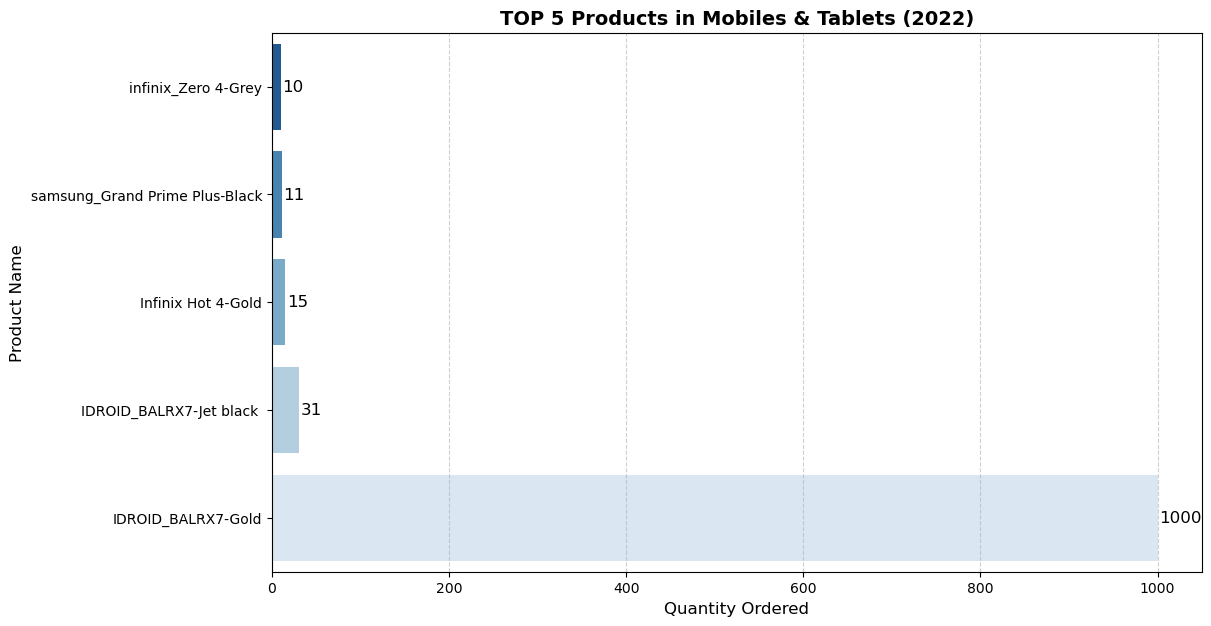

In [84]:
# Sort data in ascending order for better visualization
data1.sort_values(by='qty_2022', ascending=True, inplace=True)

# Create figure and axis
plt.figure(figsize=(12, 7))

# Create horizontal bar chart with the hue set to the y variable (sku_name)
ax = sns.barplot(
    y='sku_name',
    x='qty_2022',
    data=data1,
    hue='sku_name',  # Assigning `y` to `hue` to fix the deprecation warning
    palette='Blues_r',  # Custom color palette
    legend=False  # Disable legend as it's redundant in this case
)

# Add text labels to each bar
for index, value in enumerate(data1['qty_2022']):
    ax.text(value + 2, index, f'{value}', va='center', fontsize=12)

# Add labels and title
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.title('TOP 5 Products in Mobiles & Tablets (2022)', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

## `No 2`
**Dear Data Analyst**,
<br></br>
Following up on the joint meeting between the Warehouse Team and Marketing Team, we found that stock availability for products in the Others Category at the end of 2022 remained high.
1. We request your assistance to check the sales data for this category compared to 2021 in terms of sales quantity. Our preliminary assumption is that there was a decrease in sales quantity in 2022 compared to 2021. (Please also display data for all 15 categories)
<br></br>
2. If there was indeed a decrease in sales quantity in the Others category, we request your assistance in providing data on the TOP 20 product names that experienced the highest decrease in 2022 compared to 2021. We will use this as discussion material in our next meeting. 

Please help us by sending this data no later than 4 days from today. We appreciate your assistance.
<br></br>
Regards

**Warehouse Team**

In [56]:
data2 = pd.DataFrame(
                     df[
                        # Filter data with valid=1
                        (df['is_valid'] == 1) &
                        # Filter transactions during 2021
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))
                        ]
                     # Group by category and sum the quantity ordered
                     .groupby(by=df['category'])["qty_ordered"].sum()
                     # Sort data in descending order
                     .sort_values(ascending=False)
                     # Reset index and rename the column
                     .reset_index(name='qty_2021')
                     )
data2

,category,qty_2021
0,Soghaat,759
1,Others,426
2,Superstore,327
3,Men Fashion,237
4,Home & Living,193
5,School & Education,184
6,Health & Sports,173
7,Books,171
8,Kids & Baby,170
9,Beauty & Grooming,168


In [58]:
data3 = pd.DataFrame(
                     df[
                        # Filter data with valid=1
                        (df['is_valid'] == 1) &
                        # Filter transactions during 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
                        ]
                     # Group by category and sum the quantity ordered
                     .groupby(by=df['category'])["qty_ordered"].sum()
                     # Sort data in descending order
                     .sort_values(ascending=False)
                     # Reset index and rename the column
                     .reset_index(name='qty_2022')
                     )
data3

,category,qty_2022
0,Mobiles & Tablets,1154
1,Soghaat,612
2,Superstore,536
3,Women Fashion,489
4,Others,263
5,Home & Living,250
6,School & Education,237
7,Kids & Baby,227
8,Health & Sports,200
9,Books,195


In [60]:
# Merge data for yearly comparison
data4 = data2.merge(data3, on='category')
data4

,category,qty_2021,qty_2022
0,Soghaat,759,612
1,Others,426,263
2,Superstore,327,536
3,Men Fashion,237,175
4,Home & Living,193,250
5,School & Education,184,237
6,Health & Sports,173,200
7,Books,171,195
8,Kids & Baby,170,227
9,Beauty & Grooming,168,153


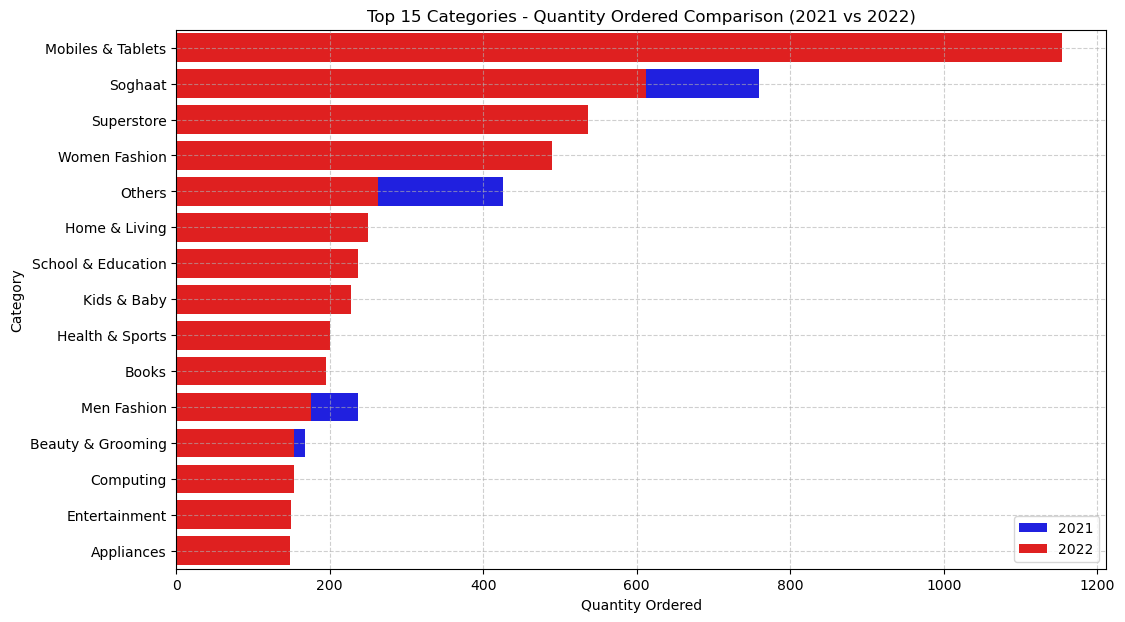

In [80]:
# Ambil 15 kategori produk dengan jumlah pesanan terbesar
top_15_categories = data4.nlargest(15, 'qty_2022')

# Visualization - Horizontal Bar Chart
plt.figure(figsize=(12, 7))

# Plot data untuk 2021
sns.barplot(
    y='category',
    x='qty_2021',
    data=top_15_categories,
    color='blue',
    label='2021'
)

# Plot data untuk 2022
sns.barplot(
    y='category',
    x='qty_2022',
    data=top_15_categories,
    color='red',
    label='2022'
)

plt.xlabel('Quantity Ordered')
plt.ylabel('Category')
plt.title('Top 15 Categories - Quantity Ordered Comparison (2021 vs 2022)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [62]:
# Calculate growth from 2021 to 2022
data4['qty_growth'] = data4['qty_2022'] - data4['qty_2021']
data4.sort_values(by=['qty_growth'], ascending=True, inplace=True)
data4

,category,qty_2021,qty_2022,qty_growth
1,Others,426,263,-163
0,Soghaat,759,612,-147
3,Men Fashion,237,175,-62
9,Beauty & Grooming,168,153,-15
7,Books,171,195,24
11,Appliances,124,148,24
6,Health & Sports,173,200,27
12,Computing,109,153,44
5,School & Education,184,237,53
4,Home & Living,193,250,57


In [66]:
# Save filtered data for category 'Others' in 2021
data5 = pd.DataFrame(
                     df[
                        # Filter data with valid=1
                        (df['is_valid'] == 1) &
                        # Filter category 'Others'
                        (df['category'] == 'Others') &
                        # Filter transactions during 2021
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))
                        ]
                     # Group by SKU name and sum the quantity ordered
                     .groupby(by=df['sku_name'])["qty_ordered"].sum()
                     # Sort data in descending order
                     .sort_values(ascending=False)
                     # Reset index and rename the column
                     .reset_index(name='qty_2021')
                     )
data5

,sku_name,qty_2021
0,RB_Dettol Germ Busting Kit-bf,200
1,Telemall_MM-DR-HB-L,23
2,Dawlance_MD 10 + DWB 600,23
3,iu_Tickets General Enclosure-Islamabad,20
4,RS_Rehmat-e-Shereen Mix Mithai,13
...,...,...
82,MEGUIAR_G13115,1
83,MEGUIAR_G12718,1
84,MEGUIAR_G10307,1
85,MEGUIAR_A2116,1


In [68]:
# Save filtered data for category 'Others' in 2022
data6 = pd.DataFrame(
                     df[
                        # Filter data with valid=1
                        (df['is_valid'] == 1) &
                        # Filter category 'Others'
                        (df['category'] == 'Others') &
                        # Filter transactions during 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
                        ]
                     # Group by SKU name and sum the quantity ordered
                     .groupby(by=df['sku_name'])["qty_ordered"].sum()
                     # Sort data in descending order
                     .sort_values(ascending=False)
                     # Reset index and rename the column
                     .reset_index(name='qty_2022')
                     )
data6

,sku_name,qty_2022
0,RB_Dettol Germ Busting Kit-bf,45
1,emart_Tyre Shape Air Compressor,34
2,SKMT_Medicine,20
3,shoppers stop_MagicGlass-3,13
4,TCF_Educate-a-Child-for-a-Month,8
...,...,...
94,Z&A_ZEES-0122,1
95,Kansai_High Heat Auto _ Aluminium,1
96,audionic_Shock-2,1
97,Kansai_Auto_Camouflag_Olive,1


In [70]:
# Merge data for category 'Others'
data_check = data5.merge(data6, how='outer')
data_check.fillna(0, inplace=True)

# Calculate growth from 2021 to 2022
data_check['qty_growth'] = data_check['qty_2022'] - data_check['qty_2021']
data_check.sort_values(by=['qty_growth'], ascending=True, inplace=True)
data_check = data_check.head(20)
data_check

,sku_name,qty_2021,qty_2022,qty_growth
69,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
18,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
84,Telemall_MM-DR-HB-L,23.0,2.0,-21.0
137,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
70,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
141,kansai_NeverWet,10.0,1.0,-9.0
154,sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
133,emart_00-1,7.0,1.0,-6.0
93,Vouch 365 2016,5.0,0.0,-5.0
4,Am-PTV_ATS-004-M,5.0,0.0,-5.0


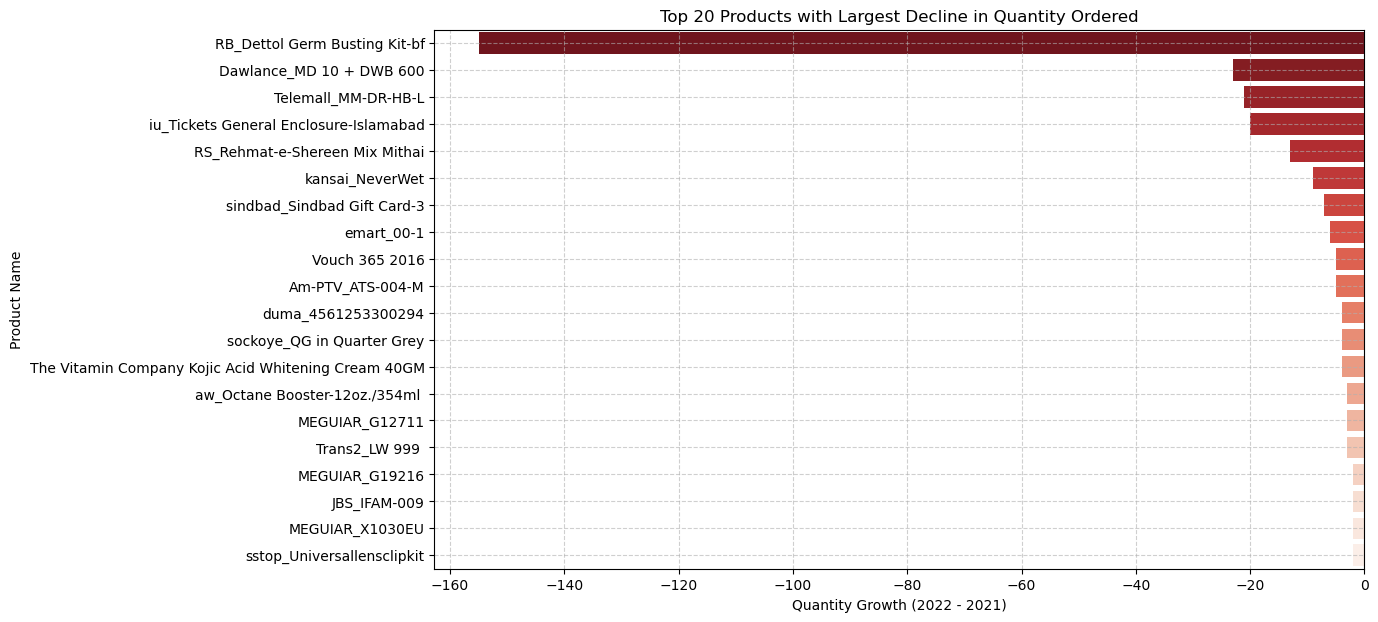

In [78]:
# Visualization - Horizontal Bar Chart
plt.figure(figsize=(12, 7))
sns.barplot(
    y='sku_name',
    x='qty_growth',
    data=data_check,
    hue='sku_name',  # Menambahkan hue agar palet warna tetap berlaku
    palette='Reds_r',
    legend=False  # Menonaktifkan legenda agar tidak berlebihan
)
plt.xlabel('Quantity Growth (2022 - 2021)')
plt.ylabel('Product Name')
plt.title('Top 20 Products with Largest Decline in Quantity Ordered')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## `No 3`
**Dear Data Analyst**,
<br></br>
Regarding the company's anniversary in the next 2 months, the Digital Marketing Team will provide promotional information to customers at the end of this month. The criteria for customers we need are those who have completed checkout but have not yet made payment (is_gross = 1) during 2022. The data we need are Customer ID and Registered Date.

Please help us by sending this data to the Digital Marketing Team before the end of this month. We appreciate your assistance.
<br></br>
Regards

**Digital Marketing Team**

In [87]:
# Filter the data and store it in a Pandas DataFrame
data8 = df[
    # Filter data where gross = 1
    (df['is_gross'] == 1) &
    # Filter data where valid = 0
    (df['is_valid'] == 0) &
    # Filter data where net = 0
    (df['is_net'] == 0) &
    # Filter data for transactions during 2022
    ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
]

# Display the filtered data (data8)
data8

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
9,ODR9699658949w,C246762L,2022-05-21,P168052,6487648,1,6487648,638000,5849648,1,0,0,7,Easypay,iPhone7Plus-Red-256GB,6487648,5125228,Mobiles & Tablets,2022-05-08
18,ODR1965502162e,C848774L,2022-05-20,P168052,6487648,1,6487648,364812,6122835,1,0,0,2,jazzvoucher,iPhone7Plus-Red-256GB,6487648,5125228,Mobiles & Tablets,2021-11-07
19,ODR8450052777q,C693415L,2022-04-15,P132718,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Gray,5626000,4219500,Mobiles & Tablets,2022-04-12
21,ODR7673587024b,C180595L,2022-04-17,P619324,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-04-22
22,ODR7333927150n,C587425L,2022-12-04,P619324,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,ODR2291109358n,C394076L,2022-02-22,P800680,58,2,116,0,116,1,0,0,4,Payaxis,test-product-00,290,174,Others,2021-10-12
5859,ODR4338250762i,C248585L,2022-01-08,P194155,0,3,0,0,0,1,0,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-10
5865,ODR4656313388n,C471304L,2022-05-16,P194155,0,1,0,0,0,1,0,0,6,easypay_voucher,Bahr-e-Shifa,0,0,Books,2022-05-13
5881,ODR7628482404c,C265450L,2022-10-07,P194155,0,3,0,0,0,1,0,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-02-17


In [89]:
# Select specific columns ('customer_id' and 'registered_date') from data8
data9 = data8[['customer_id', 'registered_date']]

# Display the selected data (data9)
data9

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13
5881,C265450L,2022-02-17


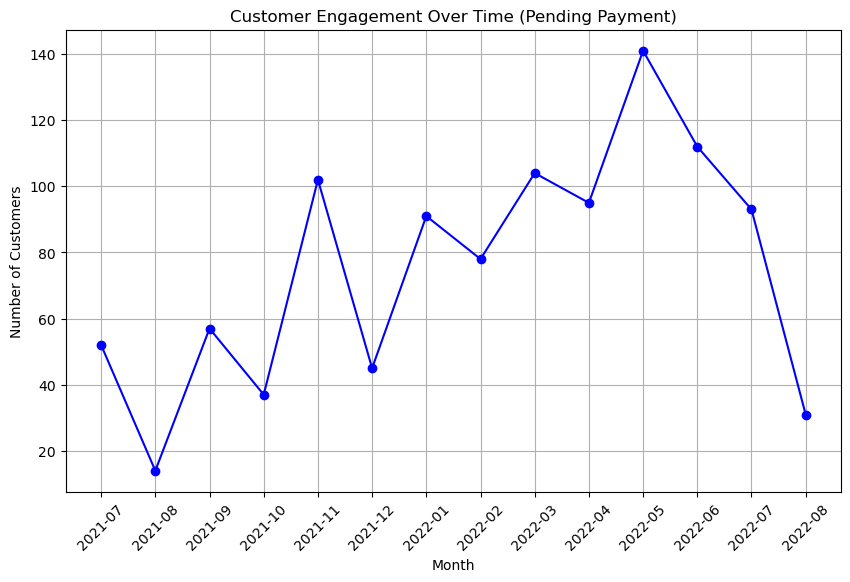

In [103]:
# Group the data by month and count the customers
data9.loc[:, 'month'] = data9['registered_date'].dt.to_period('M')
monthly_data = data9.groupby('month').count()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index.astype(str), monthly_data['customer_id'], marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customer Engagement Over Time (Pending Payment)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## `No 4`
**Dear Data Analyst**,
<br></br>
From October to December 2022, we conducted campaigns every Saturday and Sunday. We want to assess whether these campaigns had sufficient impact on sales growth (before_discount). Please help us display the following data:
1. Average daily sales on weekends (Saturday and Sunday) vs. average daily sales on weekdays (Monday-Friday) for each of those months. Please indicate if there was an increase in sales in each of these months.
2. Average daily sales on weekends (Saturday and Sunday) vs. average daily sales on weekdays (Monday-Friday) for the entire 3-month period.

Please help us by sending this data no later than next week. We appreciate your assistance.
<br></br>
Regards

**Campaign Team**

In [106]:
# Create additional columns for day, month, and month_num
df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()
df['month_num'] = df['order_date'].dt.month
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,day,month,month_num
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,Friday,November,11
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,Friday,November,11
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,Thursday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,Monday,November,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,Sunday,November,11


In [108]:
# Filter data for weekends and calculate average sales for weekends (October - December 2022)
data16 = pd.DataFrame(
    df[
        (df['is_valid'] == 1) &
        (df['day'].isin(['Saturday', 'Sunday'])) &
        (df['order_date'] >= '2022-10-01') & 
        (df['order_date'] <= '2022-12-31')
    ]
    .groupby(by=["month_num", "month"])["before_discount"].mean()
    .round()
    .sort_values(ascending=False)
    .reset_index(name='avg_sales_weekend')
)

In [110]:
# Filter data for weekdays and calculate average sales for weekdays (October - December 2022)
data17 = pd.DataFrame(
    df[
        (df['is_valid'] == 1) &
        (df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &
        (df['order_date'] >= '2022-10-01') & 
        (df['order_date'] <= '2022-12-31')
    ]
    .groupby(by=["month_num", "month"])["before_discount"].mean()
    .sort_values(ascending=False)
    .round()
    .reset_index(name='avg_sales_weekdays')
)

In [112]:
# Merge weekend and weekday sales data on 'month'
data18 = data16.merge(data17, on='month', how='left')
data18['month_num'] = data16['month_num']  # Add 'month_num' from data16

# Sort the data by 'month_num'
data18.sort_values(by='month_num', ascending=True, inplace=True)

# Final output with columns: month, avg_sales_weekend, and avg_sales_weekdays
data18 = data18[["month", "avg_sales_weekend", "avg_sales_weekdays"]]
df_groupby_weekend = data18
df_groupby_weekend

,month,avg_sales_weekend,avg_sales_weekdays
0,October,634260.0,874690.0
1,November,607794.0,641862.0
2,December,410599.0,813574.0


In [114]:
# Create additional columns for difference in value and percentage difference
df_groupby_weekend['diff_value'] = df_groupby_weekend['avg_sales_weekend'] - df_groupby_weekend['avg_sales_weekdays']
df_groupby_weekend['diff_percent'] = round(df_groupby_weekend['diff_value'] / df_groupby_weekend['avg_sales_weekend'] * 100)
df_groupby_weekend

,month,avg_sales_weekend,avg_sales_weekdays,diff_value,diff_percent
0,October,634260.0,874690.0,-240430.0,-38.0
1,November,607794.0,641862.0,-34068.0,-6.0
2,December,410599.0,813574.0,-402975.0,-98.0


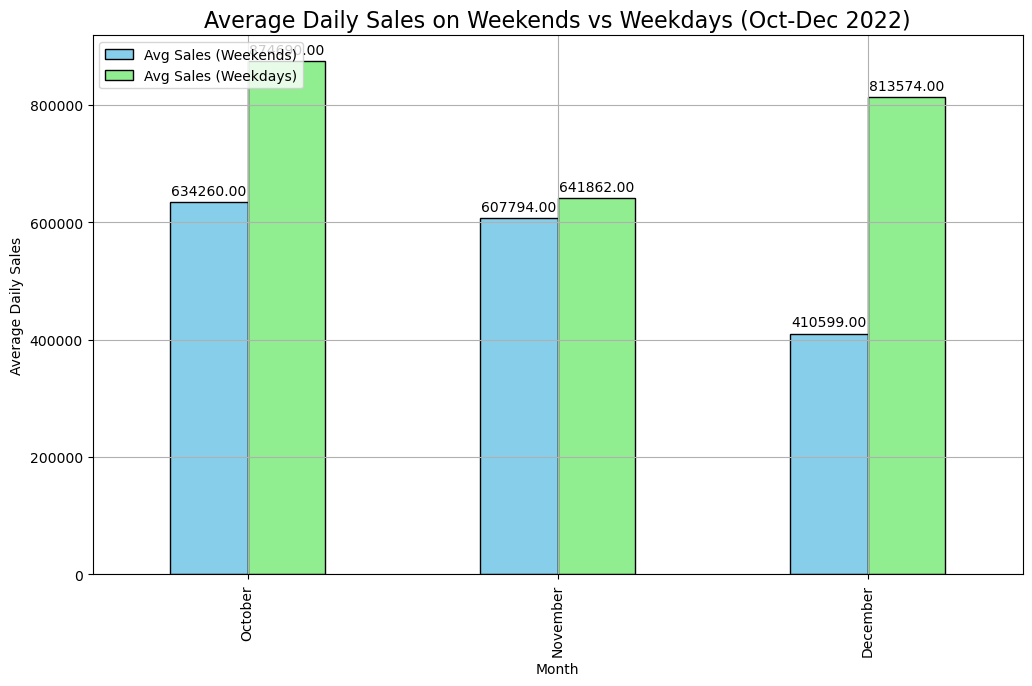

In [132]:
# Plot a bar chart comparing weekend and weekday sales with improved visual elements
ax = data18.plot(
    x='month',
    y=['avg_sales_weekend', 'avg_sales_weekdays'],
    kind='bar',
    grid=True,
    xlabel='Month',
    ylabel='Average Daily Sales',
    figsize=(12, 7),
    rot=90,
    table=False,
    color=['skyblue', 'lightgreen'],  # Different colors for weekends and weekdays
    edgecolor='black'  # Add border to bars
)

# Add a title to the chart
plt.title('Average Daily Sales on Weekends vs Weekdays (Oct-Dec 2022)', fontsize=16)

# Add a legend to distinguish between weekends and weekdays
plt.legend(['Avg Sales (Weekends)', 'Avg Sales (Weekdays)'], loc='upper left')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

plt.show()

In [120]:
# Filter data for weekend sales (October - December 2022)
weekend_2022 = df[
    (df['is_valid'] == 1) &
    (df['day'].isin(['Saturday', 'Sunday'])) &
    (df['order_date'] >= '2022-10-01') &
    (df['order_date'] <= '2022-12-31')
]

In [124]:
# Filter data for weekday sales (October - December 2022)
weekday_2022 = df[
    (df['is_valid'] == 1) &
    (df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &
    (df['order_date'] >= '2022-10-01') &
    (df['order_date'] <= '2022-12-31')
]

In [126]:
# Calculate total weekend and weekday sales differences for October to December 2022
data21 = {
    'Period': 'Total 3 months',
    'Avg Weekend Sales': round(weekend_2022['before_discount'].mean(), 2),
    'Avg Weekdays Sales': round(weekday_2022['before_discount'].mean(), 2),
    'Diff (Value)': round(weekend_2022['before_discount'].mean() - weekday_2022['before_discount'].mean(), 2),
    'Diff (%)': pd.Series(round(((weekend_2022['before_discount'].mean() - weekday_2022['before_discount'].mean()) /
                                weekend_2022['before_discount'].mean()) * 100, 2))
}
pd.DataFrame(data=data21)

,Period,Avg Weekend Sales,Avg Weekdays Sales,Diff (Value),Diff (%)
0,Total 3 months,558865.15,770146.01,-211280.86,-37.81


In [130]:
# Calculate average sales for weekend and weekdays from October to December 2022
total_sales = {
    'period': 'October - December 2022',
    'avg_weekend_sales': round(df[
        (df["day"].isin(['Saturday', 'Sunday'])) & 
        (df["is_valid"] == 1) & 
        (df["order_date"] >= '2022-10-01') & 
        (df["order_date"] <= '2022-12-31')
    ]['before_discount'].mean(), 2),
    
    'avg_weekdays_sales': round(df[
        (df["day"].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & 
        (df["is_valid"] == 1) & 
        (df["order_date"] >= '2022-10-01') & 
        (df["order_date"] <= '2022-12-31')
    ]['before_discount'].mean(), 2)
}
total_sales

{'period': 'October - December 2022',
 'avg_weekend_sales': 558865.15,
 'avg_weekdays_sales': 770146.01}

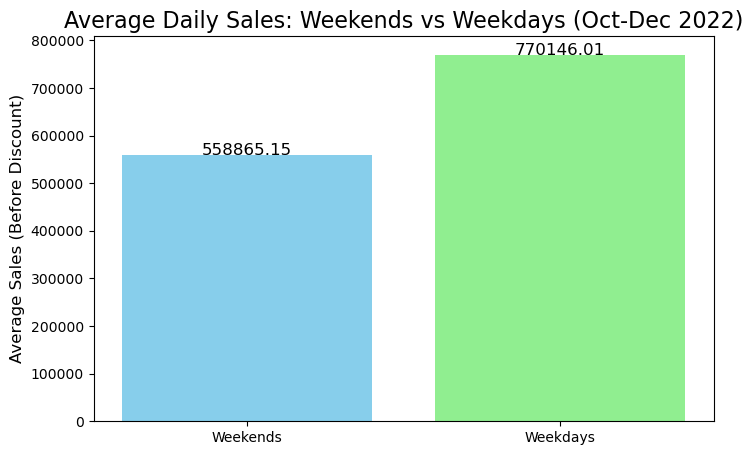

In [134]:
# Data for the bar chart
categories = ['Weekends', 'Weekdays']
values = [total_sales['avg_weekend_sales'], total_sales['avg_weekdays_sales']]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['skyblue', 'lightgreen'])

# Adding value labels on top of bars
for i in range(len(values)):
    plt.text(i, values[i] + 0.1, f'{values[i]:.2f}', ha='center', fontsize=12)

# Adding titles and labels
plt.title('Average Daily Sales: Weekends vs Weekdays (Oct-Dec 2022)', fontsize=16)
plt.ylabel('Average Sales (Before Discount)', fontsize=12)

# Show the chart
plt.show()

# Analysis for Marketing, Warehouse, Digital Marketing, and Campaign Teams

## 1. **Top 5 Products in Mobiles & Tablets Category** (For Marketing Team)

### Insights:
Based on the analysis, the top 5 products in the Mobiles & Tablets category for 2022 are:

1. **IDROID_BALRX7-Gold**: 1000 units ordered (**significantly dominant**)
2. **IDROID_BALRX7-Jet Black**: 31 units ordered
3. **Infinix Hot 4-Gold**: 15 units ordered
4. **Samsung Grand Prime Plus-Black**: 11 units ordered
5. **Infinix Zero 4-Grey**: 10 units ordered

- There is a **significant gap** between the top product (1000 units) and the second-best product (31 units).
- The **IDROID brand** appears twice in the top 5, indicating strong brand performance.
- The **Infinix brand** also appears twice, showing good customer reception.

### Recommendations for Marketing Team:
- **Use IDROID_BALRX7-Gold** as the **main prize** for the Year-End Festival competition.
- Create **tiered prizes** with the top 5 products, with IDROID_BALRX7-Gold as the grand prize.
- Consider **bundling** the lower-volume products (positions 2-5) with **accessories or service packages** to increase their perceived value.
- **Highlight** the popularity of these products in **promotional materials** for the competition.
- Partner with **IDROID** and **Infinix** for potential co-sponsorship of the competition.

---

## 2. **Category Performance and Declining Products** (For Warehouse Team)

### Insights on Category Performance:
- The data confirms the warehouse team's suspicion: the "**Others**" category did experience a **decline** in quantity ordered in 2022 compared to 2021.
- Among the 15 categories displayed, most categories showed **growth** in 2022.
- The **Mobiles & Tablets** category showed the **strongest performance** with significant growth.
- Other categories showing a **decline** besides "Others" include **Soghaat** (substantial decline) and **Men's Fashion** (moderate decline).
- **Women's Fashion** and **Superstore** categories showed **healthy growth**.

### Insights on Declining Products:
- The top products with the largest decline in quantity ordered are mostly health/hygiene products, event tickets, and specialty food items.
- Products such as **RB Dettol Germ Busting Kit**, **Dawlance MD 10 + DWB 600**, and **IU_Tickets General Enclosure-Islamabad** experienced notable declines.
- Several **MEGUIAR** products also appear, indicating a wider category issue.

### Recommendations for Warehouse Team:
- **Reduce inventory** levels for the identified declining products, especially **RB Dettol Germ Busting Kit**.
- Consider **bundling** slow-moving items from the "Others" category with high-selling products.
- Implement **targeted clearance sales** for the **Top 20 declining products**.
- Review the **positioning** and **marketing strategy** for products in the "Others" category.
- Increase **warehouse space allocation** for growing categories like **Mobiles & Tablets**.

---

## 3. **Customer Engagement for Pending Payments** (For Digital Marketing Team)

### Insights:
The analysis of pending payments shows fluctuating numbers of customers with **pending payments** (`is_gross = 1`) throughout 2021-2022.

- **Highest number**: May 2022 (~140 customers)
- **Lowest number**: August 2021 (~15 customers)
- **Notable peaks**: November 2021 (~100), March 2022 (~105), May 2022 (~140)
- **Notable valleys**: August 2021 (~15), December 2021 (~45), August 2022 (~30)

- The trend shows an **overall increase** from July 2021 to May 2022, followed by a decline.
- For most of **2022**, pending payments remained **higher** than in 2021.

### Recommendations for Digital Marketing Team:
- **Target all customers** with pending payments from 2022 for the **anniversary promotion**.
- **Segment customers** based on the timing of pending payments (recent vs. older).
- Offer **special incentives** to customers with pending payments in **May 2022** (the peak period).
- Design **time-limited offers** to create urgency and convert these pending payments.
- Tailor **messaging approaches** for customers from different time periods.
- Implement a **re-engagement campaign** specifically targeting abandoned carts.

---

## 4. **Weekend Campaign Performance** (For Campaign Team)

### Insights on Monthly Comparison:
For all three months (October-December 2022), **weekday sales** consistently outperformed **weekend sales**:

- **October**: Weekend Sales (634,260) vs Weekday Sales (874,690) – Weekdays **37.7% higher**
- **November**: Weekend Sales (607,794) vs Weekday Sales (641,862) – Weekdays **5.6% higher**
- **December**: Weekend Sales (410,599) vs Weekday Sales (813,574) – Weekdays **98% higher**

- **December** showed the largest disparity between weekday and weekend sales.
- Weekend performance was **relatively better** in November compared to other months.
- **No month** showed weekends outperforming weekdays.

### Insights on Overall Comparison:
- **Weekend**: 558,865 (average sales)
- **Weekdays**: 770,146 (average sales)

- Weekday sales were approximately **37.8% higher** than weekend sales on average.
- The data does not support that **weekend campaigns** effectively increased sales.

### Recommendations for Campaign Team:
- **Reevaluate** the weekend-focused campaign strategy, as weekend sales consistently underperformed weekdays.
- Investigate the **reasons for weekend underperformance** (user behavior, technical issues, competitive activities).
- Test shifting campaign resources to **weekdays** or create specialized weekend offers with **deeper discounts**.
- Consider a different approach for **December weekends**, which showed the largest gap.
- Implement **A/B testing** for different campaign strategies on weekends.
- Analyze if specific **product categories** perform better on weekends and focus campaigns on those.
- Review campaign **messaging** and **call-to-action elements** to improve weekend conversion rates.

---

**Note**: Ensure that each team (Marketing, Warehouse, Digital Marketing, and Campaign) focuses on their respective recommendations to improve overall performance.
